In [1]:
import os
import cv2
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
def crop_50(image_path,save_path,daxiao=50):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    h,w = img.shape[0:2]
    img_name = os.path.basename(image_path).split('.')[0]
    for i in range(0,h,daxiao):
        for j in range(0,w,daxiao):
            p = i if i+50 <= h else h-50
            q = j if j+50 <= w else w-50
            temp = img[p:p+50,q:q+50,::]
            cv2.imwrite(save_path+img_name+'_{}_{}.png'.format(p,q),temp)

In [3]:
def get_info(csv_path):
    res = []
    idx = 0
    with open(csv_path,'r') as f:
        reader = csv.reader(f)
        for row in reader:
            temp = {}
            idx += 1
            if idx > 1:
                temp['name'] = row[0]
                temp['zhi'] = row[1]
                res.append(temp)
    return res
    

In [4]:
def gen_heatmap(image_path,res):
    img = cv2.imread(image_path)
    h,w = img.shape[0:2]
    heatmap = np.zeros((h,w),dtype=float)
    count = np.zeros((h,w),dtype=float)
    image_name = os.path.basename(image_path).split('.')[0]
    for data in res:
        img_name = data['name']
        name = img_name.split('_')[0]
        if name == image_name:
#             print(image_name)
            i,j = img_name.split('_')[1:3]
            i = int(i)
            j = int(j)
            temp = data['zhi']
            heatmap[i:i+50,j:j+50] = heatmap[i:i+50,j:j+50] + float(temp)
            count[i:i+50,j:j+50] = count[i:i+50,j:j+50]+1
    count[count==0] = 999
    heatmap = heatmap /count
#     print(heatmap)
    return heatmap
    

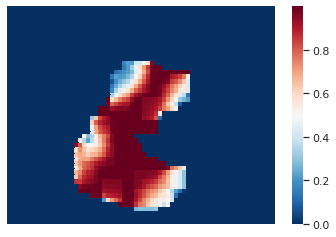

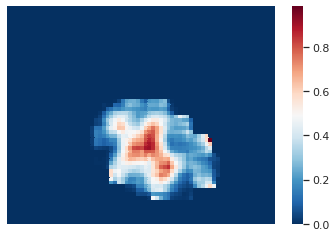

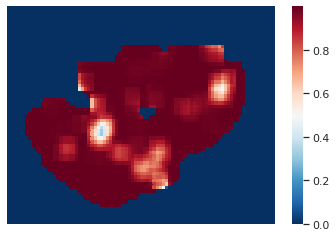

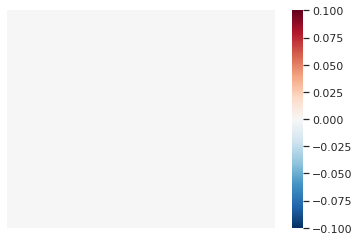

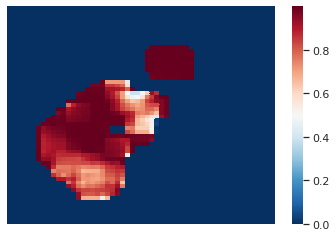

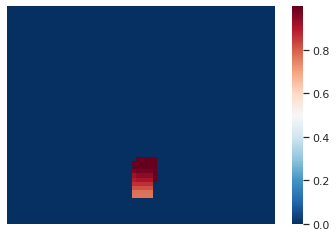

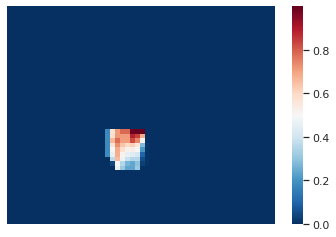

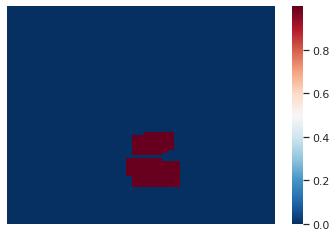

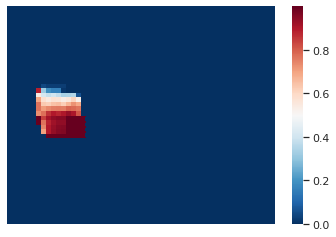

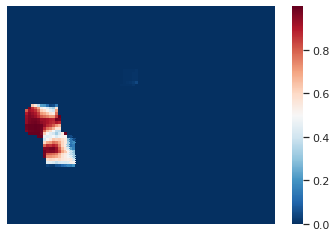

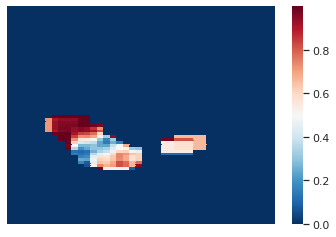

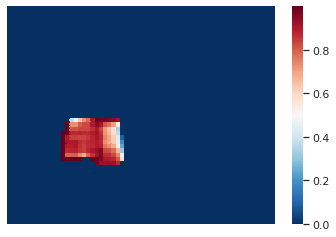

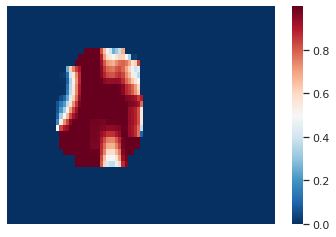

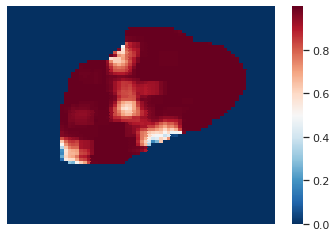

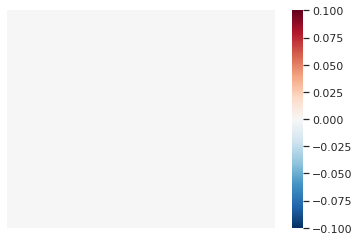

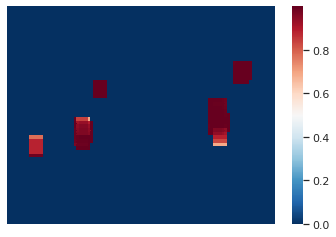

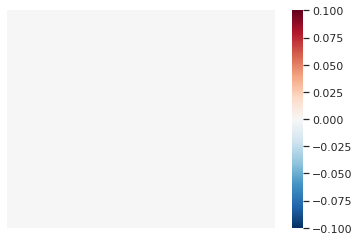

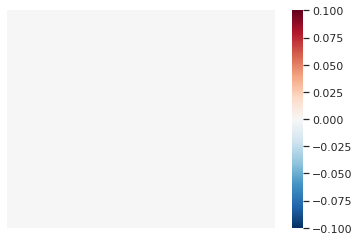

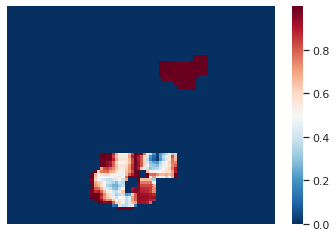

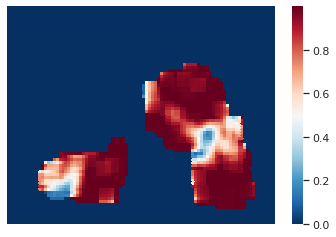

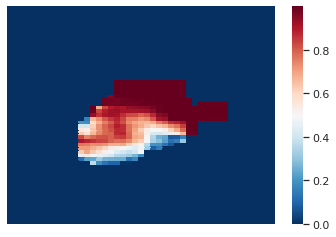

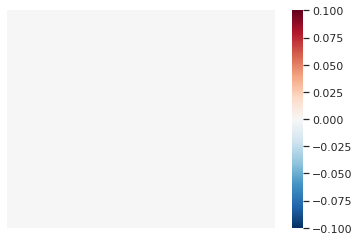

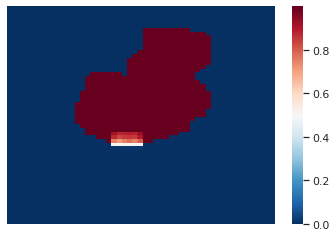

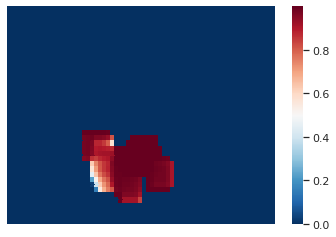

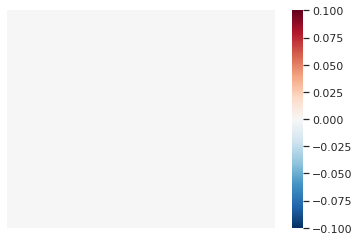

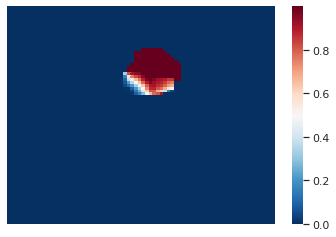

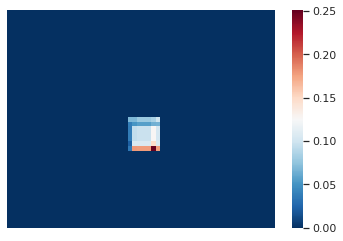

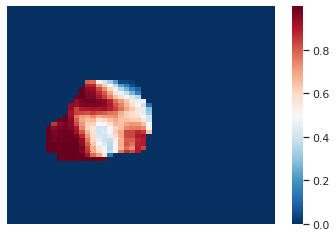

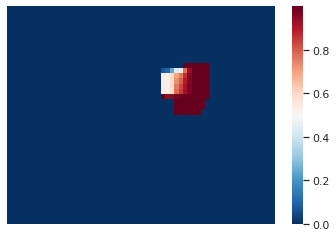

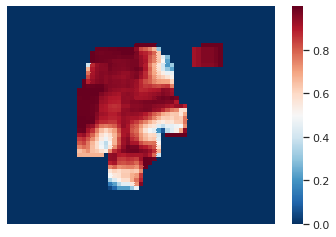

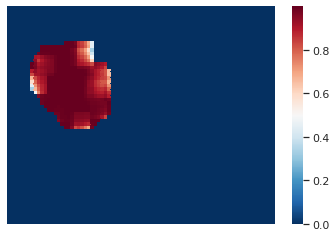

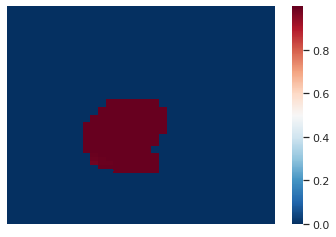

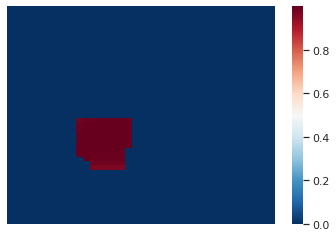

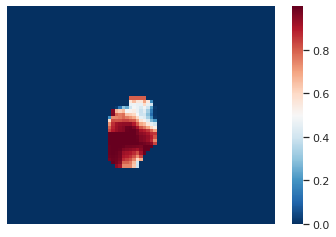

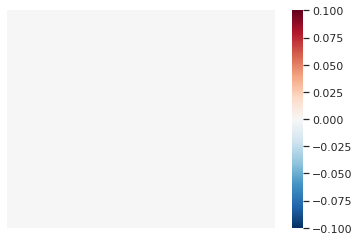

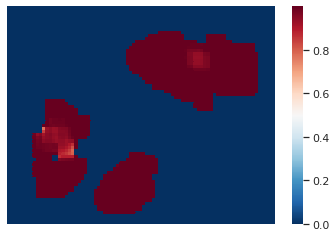

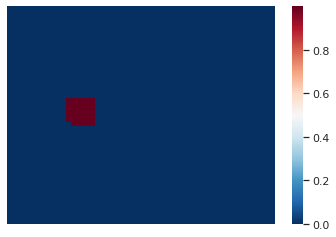

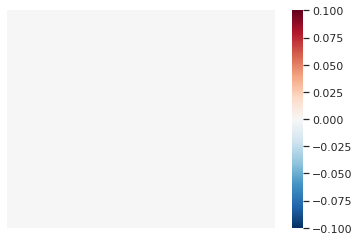

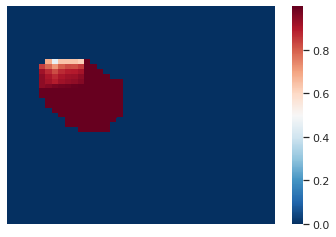

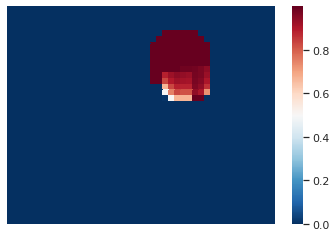

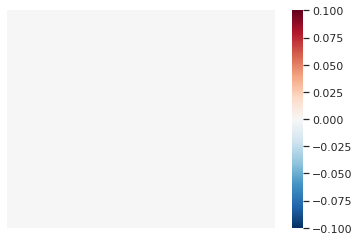

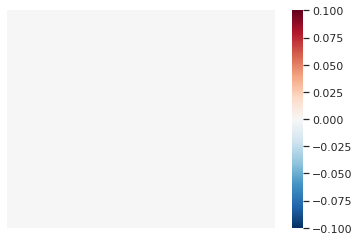

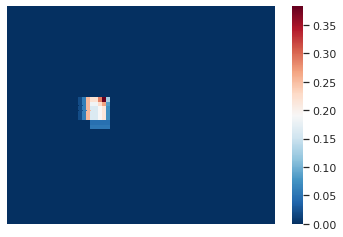

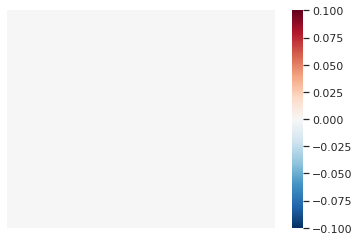

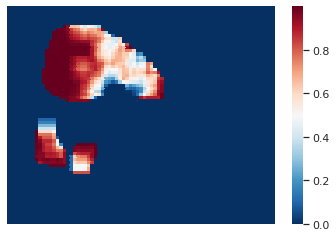

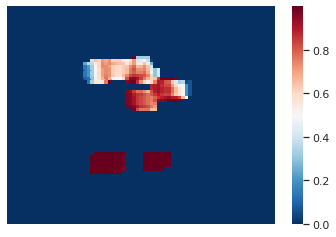

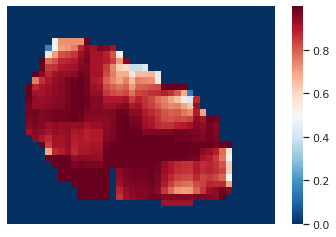

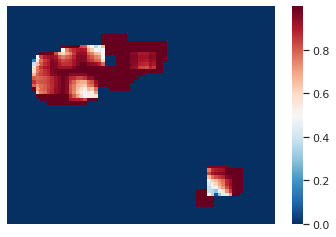

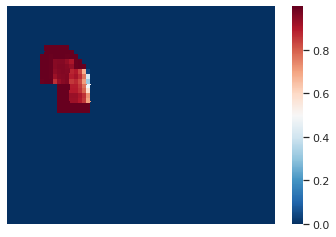

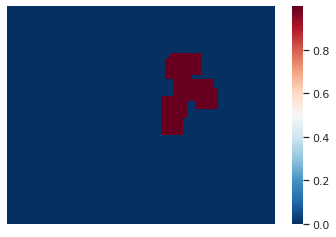

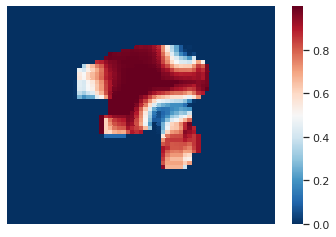

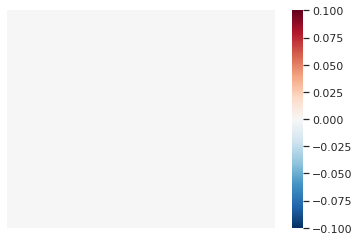

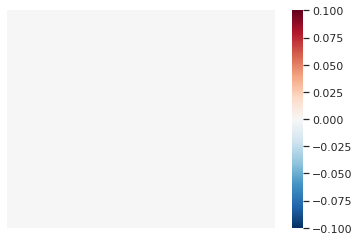

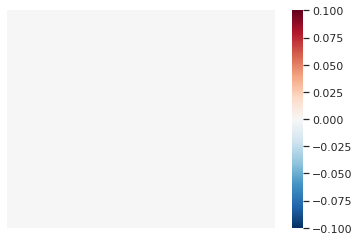

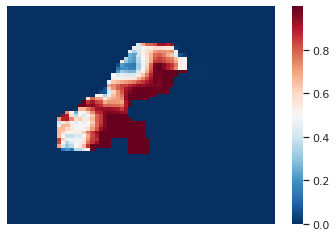

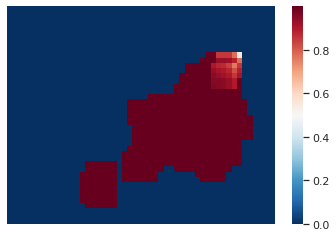

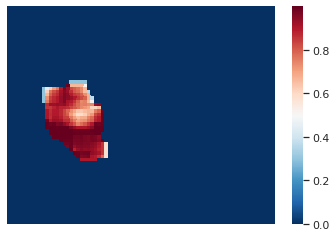

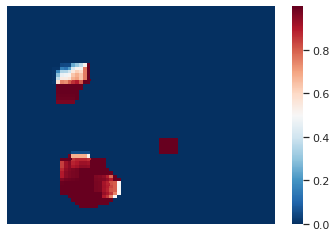

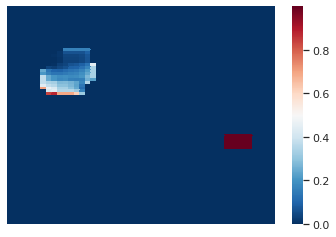

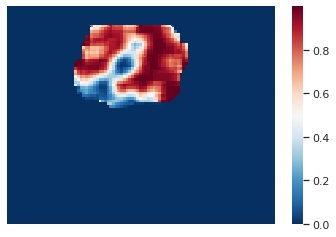

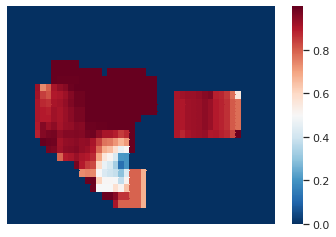

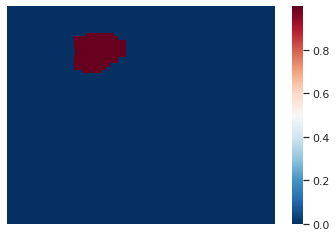

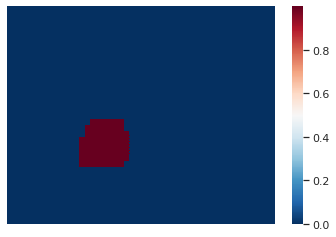

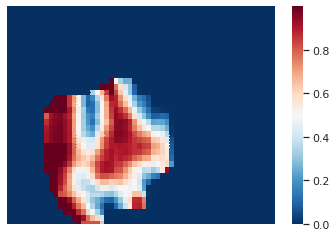

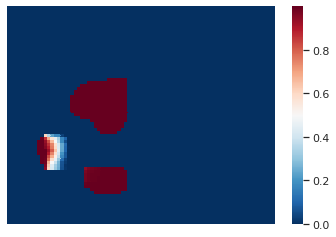

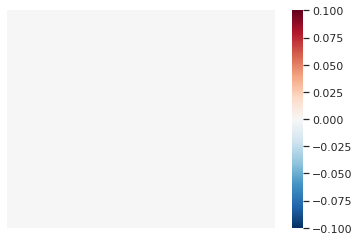

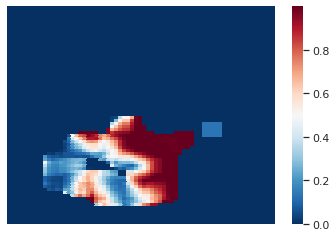

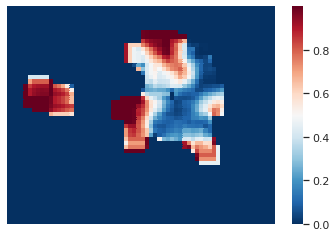

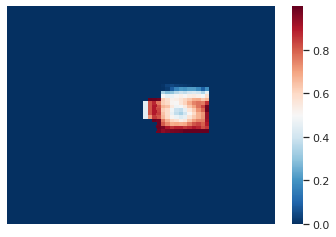

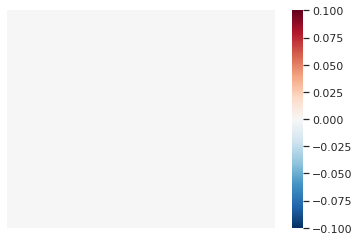

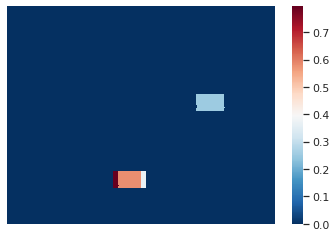

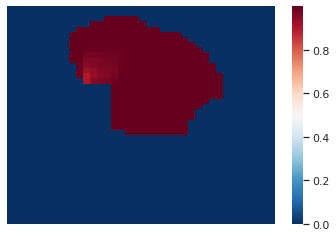

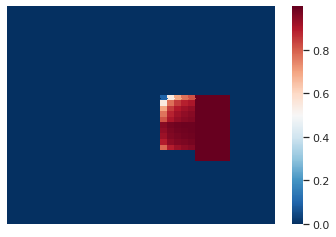

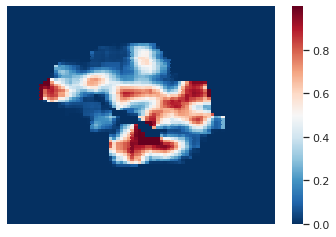

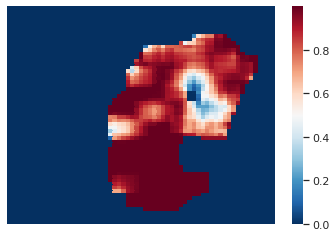

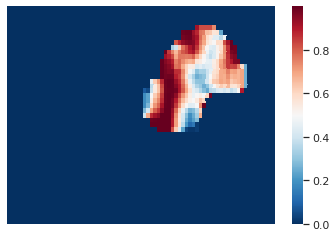

In [5]:
def main():
#     image_path = '/home/bnc/tool/HistomicsML/yourproject/classify/data/test/50017010.png'
#     save_path = '/home/bnc/tool/HistomicsML/yourproject/classify/data/test/tu/'
    csv_path = '/home/bnc/tool/HistomicsML/yourproject/classify/submissions/res/50epoch_0.001clip_1runs_alex_net.csv'
    label_path = '/home/bnc/tool/HistomicsML/yourproject/classify/label/'
    image_path = '/home/bnc/tool/HistomicsML/yourproject/classify/images/'
    image_list = glob.glob(image_path+'*.png')
    res = get_info(csv_path)
    for img in image_list:
        image_name = os.path.basename(img).split('.')[0]
        heat_map = gen_heatmap(img,res)
        mask = cv2.imread(label_path+image_name+'_pred.png')
        sns.set()
        ax = sns.heatmap(heat_map, cmap='RdBu_r')
        plt.axis('off')
        plt.savefig('/home/bnc/tool/HistomicsML/yourproject/classify/heatmap/'+image_name+'_hmap.png')
        plt.show()
#         plt.imshow(mask)
#         plt.show()
    
if __name__ == '__main__':
    main()